In [1]:
# This notebook is for preprocessing the data from korp

# packages

import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re

In [3]:
# data

## varmaan

with open("varmaankaikki.json") as fp:
    data = json.load(fp)

In [4]:
mylist=[]

for v in data["kwic"]:
    #print(v.keys())
    #for v in i.values():
    party=v["structs"]['paragraph_speaker_parl_group']
    speaker=v["structs"]["paragraph_speaker"]
    date=v["structs"]["text_date"]
    speech_type = v["structs"]["paragraph_speech_type"]
    tokens =v["tokens"]#["tokens"]
    sentence= " ".join([t["word"] for t in tokens])
    mylist.append({"party":party, "speaker":speaker, "date":date,  "sentence":sentence})
print(len(mylist))

6594


In [5]:
df = pd.DataFrame(mylist)

# extract only year and month
df["session"] = df['date'].str.extract('(\d{4}-\d{2})', expand=True)

In [6]:
for i in range(12):
    #print(i)
    if i <= 8:
        m = "-0" + str(i+1) +"-"
    else:
        m = "-" + str(i+1) +"-"
    month=df["date"].str.contains(m)
    print( m , len(df[month]))
#df[tammi]

-01- 119
-02- 598
-03- 692
-04- 500
-05- 486
-06- 635
-07- 41
-08- 0
-09- 790
-10- 719
-11- 894
-12- 1120


In [7]:
# remove jan, jul, aug
month=~df["date"].str.contains("-07-|-08-|-01-|2008") # does not contain these
df1 = df[month]
print(len(df1), len(df))
df1.head()

6105 6594


,party,speaker,date,sentence,session
329,vihr,Heidi Hautala,2009-02-05,Jos tämä nyt on vielä sopimatta niin siitä var...,2009-02
330,kd,Toimi Kankaanniemi,2009-02-05,Tuo jo toistakymmentä vuotta Suomenkin osalta ...,2009-02
331,kok,Timo Heinonen,2009-02-05,Mutta kun häiriköinti jatkuu ja on systemaatti...,2009-02
332,kok,Tuulikki Ukkola,2009-02-05,Minua ne eivät häiritse eivätkä varmaan häirit...,2009-02
333,kok,Juha Hakola,2009-02-05,Ensinnäkin se että varmaan tekin tiedätte että...,2009-02


In [8]:
# drop duplicates
df1=df1.drop_duplicates(["sentence","speaker"])
print(len(df1))

6021


In [9]:
print(df1.groupby("session").size().head())

session
2009-02     86
2009-03    116
2009-04     82
2009-05     36
2009-06     93
dtype: int64


In [17]:
# save
df1.to_csv("varmaandata.csv", sep="\t")

In [10]:
#df08 = df1[df1["session"].str.contains("2008")]
df09 = df1[df1["session"].str.contains("2009")]
df10 = df1[df1["session"].str.contains("2010")]
df11 = df1[df1["session"].str.contains("2011")]
df12 = df1[df1["session"].str.contains("2012")]
df13 = df1[df1["session"].str.contains("2013")]
df14 = df1[df1["session"].str.contains("2014")]
df15 = df1[df1["session"].str.contains("2015")]
df16 = df1[df1["session"].str.contains("2016")]

sessions=df1.drop_duplicates("date").groupby("session",as_index=False).size()
# create a column for sessions per month
s  = pd.DataFrame(df1['session'].value_counts().sort_index()).reset_index()# / sessions["size"]
#df08

#s["proportional"] = s
#s["session"]/ 
#sessions["size"]
sessions#.head(n=20)
s["prop"] =s["session"] / sessions["size"]
s["n_sessions"] = sessions["size"]
s
#s["sessioncount"]

,index,session,prop,n_sessions
0,2009-02,86,9.555556,9
1,2009-03,116,8.285714,14
2,2009-04,82,7.454545,11
3,2009-05,36,6.000000,6
4,2009-06,93,13.285714,7
...,...,...,...,...
60,2016-02,97,8.083333,12
61,2016-03,66,5.500000,12
62,2016-04,112,8.615385,13
63,2016-05,77,5.500000,14


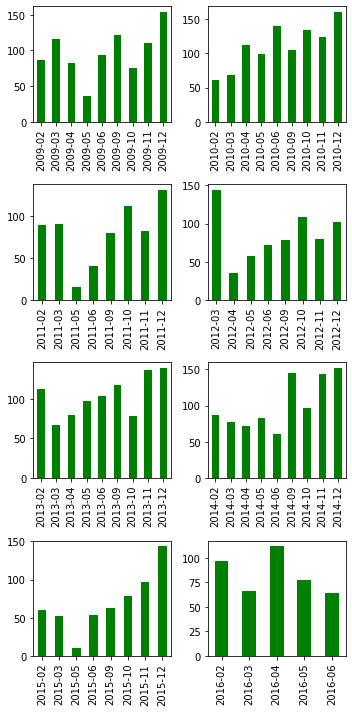

In [26]:
# Plot monthly use

#define number of rows and columns for subplots
nrow=4
ncol=2

# make a list of all dataframes 
df_list = [df09, df10, df11, df12, df13,df14,df15,df16]

#for d in df_list:
    
fig, axes = plt.subplots(nrow, ncol, figsize=(5,10))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        #df_list[count].plot(ax=axes[r,c])
        s  = df_list[count]['session'].value_counts().sort_index()
        s.plot.bar(ax=axes[r,c],color="green")
        count+=1
fig.tight_layout()
#fig.savefig("varmaan.png")

In [ ]:
# varmasti

In [11]:
with open("varmastikaikki.json") as fp:
    data2 = json.load(fp)

In [12]:
mylist=[]

for v in data2["kwic"]:
    #print(v.keys())
    #for v in i.values():
    party=v["structs"]['paragraph_speaker_parl_group']
    speaker=v["structs"]["paragraph_speaker"]
    date=v["structs"]["text_date"]
    speech_type = v["structs"]["paragraph_speech_type"]
    tokens =v["tokens"]#["tokens"]
    sentence= " ".join([t["word"] for t in tokens])
    mylist.append({"party":party, "speaker":speaker, "date":date,  "sentence":sentence})
print(len(mylist))

13928


In [18]:
df2 = pd.DataFrame(mylist)
df2 # s = df['date'].value_counts().sort_index()

df2["session"] = df2['date'].str.extract('(\d{4}-\d{2})', expand=True)
df2["month"] = df2['date'].str.extract('(-\d{2}-)', expand=True)

df2=df2.drop_duplicates(["sentence","speaker"])
# remove jan, jul, aug
month=~df2["session"].str.contains("-07|-08|-01|2008") # does not contain these
df3 = df2[month]
print(len(df2), len(df3))
df3.head()


13626 12543


,party,speaker,date,sentence,session,month
773,,Matti Vanhanen,2009-02-05,Omistajaohjausministeri vastaa varmasti yksitt...,2009-02,-02-
774,,Jyrki Katainen,2009-02-05,Yritysrahoituksen kohdalla Suomi oli ensimmäis...,2009-02,-02-
775,sd,Pia Viitanen,2009-02-05,On hienoa että te valtiovarainministeri Katain...,2009-02,-02-
776,,Jyrki Katainen,2009-02-05,Sitten on varmasti asioita joissa on erilaisia...,2009-02,-02-
777,vas,Annika Lapintie,2009-02-05,Fakta on varmasti se että tällaisessa taantuma...,2009-02,-02-


In [19]:
# save
df3.to_csv("varmastidata.csv", sep="\t")

In [14]:

df08 = df3[df3["session"].str.contains("2008")]
df09 = df3[df3["session"].str.contains("2009")]
df10 = df3[df3["session"].str.contains("2010")]
df11 = df3[df3["session"].str.contains("2011")]
df12 = df3[df3["session"].str.contains("2012")]
df13 = df3[df3["session"].str.contains("2013")]
df14 = df3[df3["session"].str.contains("2014")]
df15 = df3[df3["session"].str.contains("2015")]
df16 = df3[df3["session"].str.contains("2016")]
s3  = df3['session'].value_counts().sort_index()

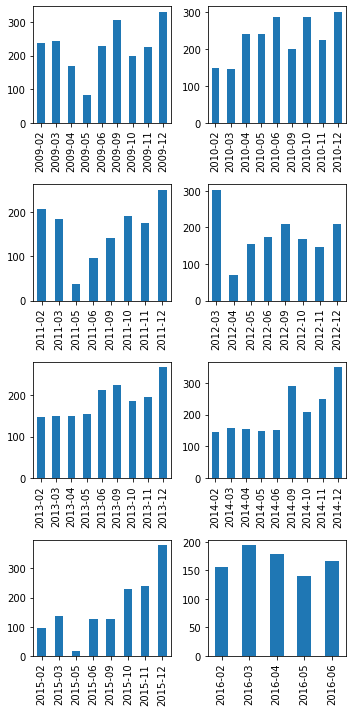

In [31]:
nrow=4
ncol=2

# make a list of all dataframes 
df_list = [df09, df10, df11, df12, df13,df14,df15,df16]

#for d in df_list:
    
fig, axes = plt.subplots(nrow, ncol, figsize=(5,10))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        #df_list[count].plot(ax=axes[r,c])
        s  = df_list[count]['session'].value_counts().sort_index()
        s.plot.bar(ax=axes[r,c])
        count+=1
fig.tight_layout()
#fig.savefig("varmasti.png")

In [15]:
## 2. Annotation

In [1]:

#!pip install wikipedia
import wikipedia

In [9]:
wikipedia.set_lang("fi")

# try out a page
ny = wikipedia.page("Henna Virkkunen")

In [32]:
# add sociolinguistic variables

# dictionary for speakers
df_merged = pd.concat([df2,df])
#df_merged
speakers  = df_merged.drop_duplicates("speaker")
sdict= {}
for i,row in speakers.iterrows():
    speaker= row["speaker"]
    party= row["party"]
    sdict[speaker] = {"party":party}
    print(speaker, party)
    try:
        wiki = wikipedia.page(speaker) # wikipedia scraper
        text = wiki.content
        bd = re.findall(r'\([^()]*\)', text)[0] # find birthday and birth place
        birthyear = bd
    except:
        birthyear = "not found"
    sdict[speaker]["birthyear"] = birthyear
    gender = input() # add gender manually
    sdict[speaker]["gender"] = gender

Pekka Vilkuna kesk
m
Pentti Tiusanen vas
m
Henna Virkkunen kok
f
Kimmo Sasi kok
m
Tuulikki Ukkola kok
f
Erkki Pulliainen vihr
m
Markku Laukkanen kesk
m
Erkki Virtanen vas
m
Timo Heinonen kok
m
Eero Akaan-Penttilä kok
m
Valto Koski sd
m
Toimi Kankaanniemi kd
m
Paavo Arhinmäki vas
m
Merja Kyllönen vas
f
Anu Vehviläinen 
f
Markku Rossi kesk
m
Raimo Vistbacka ps
m
Pertti Salovaara kesk
m
Ben Zyskowicz kok
m
Esko-Juhani Tennilä vas
m
Jyri Häkämies 
m
Alexander Stubb 
m
Mikko Alatalo kesk
m
Inkeri Kerola kesk
f
Matti Kangas vas
m
Lenita Toivakka kok
f
Arto Satonen kok
m
Reijo Laitinen sd
m
Merja Kuusisto sd
f
Hannu Hoskonen kesk
m
 
0
Sari Sarkomaa 
f
Päivi Räsänen kd
f
Esa Lahtela sd
m
Marko Asell sd
m
Anneli Kiljunen sd
f
Jyrki Katainen 
m
Pekka Ravi kok
m
Jutta Urpilainen sd
f
Christina Gestrin r
f
Aila Paloniemi kesk
f
Liisa Hyssälä 
f
Harri Jaskari kok
m
Anni Sinnemäki vihr
f
Ilkka Kantola sd
m
Olli Nepponen kok
m
Ulla Karvo kok
f
Bjarne Kallis kd
m
Tero Rönni sd
m
Sanna Lauslahti kok
f

/home/telmix/Desktop/telmix/sda7/conspiracy/code/fabula/fab2/lib/python3.9/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/telmix/Desktop/telmix/sda7/conspiracy/code/fabula/fab2/lib/python3.9/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


m
Pekka Haavisto vihr
m
Sampsa Kataja kok
m
Tapani Tölli kesk
m
Arja Karhuvaara kok
f
Tuula Väätäinen sd
f
Marjaana Koskinen sd
f
Sari Palm kd
f
Sirpa Paatero sd
f
Kari Kärkkäinen kd
f
Timo Soini ps
m
Pertti Hemmilä kok
m
Timo V. Korhonen kesk
m
Petri Salo kok
m
Heikki A. Ollila kok
m
Ilkka Kanerva kok
m
Eero Lehti kok
m
Petteri Orpo kok
m
Jari Larikka kok
m
Tanja Karpela kesk
f
Raija Vahasalo kok
f
Anne-Mari Virolainen kok
f
Outi Mäkelä kok
f
Johanna Ojala-Niemelä sd
f
Elsi Katainen kesk
f
Marjo Matikainen-Kallström kok
f
Paula Risikko 
f
Paula Sihto kesk
f
Hanna-Leena Hemming kok
f
Juha Korkeaoja kesk
m
Juha Hakola kok
m
Håkan Nordman r
m
Juha Mieto kesk
m
Päivi Lipponen sd
f
Kimmo Kiljunen sd
m
Pentti Oinonen ps
m
Tapani Mäkinen kok
m
Johanna Karimäki vihr
f
Jukka Mäkelä kok
m
Pirkko Ruohonen-Lerner ps
f
Tommy Tabermann sd
m
Susanna Huovinen sd
f
Johanna Sumuvuori vihr
f
Ilkka Viljanen kok
m
Outi Alanko-Kahiluoto vihr
f
Esko Ahonen kesk
m
Tuomo Puumala kesk
m
Jacob Söderman sd
m
Mia

In [65]:
with open("metadict.json") as fp:
    mydict = json.load(fp)

In [66]:
# loop to check
cleandict= {}
elsedict ={}
keys = list(mydict.keys())
for k,v in mydict.items():
    bd = v["birthyear"]
   # print(v["birthyear"])
    if "o.s." in bd:
        bd = bd.replace("o.s.", "")
    if "s. " in bd:
        clean = re.split('(s. \d{1}. [a-zäöå] \d{4} [a-zäöå])', bd)[0]
        cleanl = clean.split("–")[0]
        cleanthing = re.findall('(\d{4} [A-Za-zäöå]*)', cleanl)
        print(cleanthing)
        v["cleanyear"] = cleanthing
        cleandict[k] = sdict[k]
        cleandict[k]["cleanyear"] = cleanthing
        try:
            cleandict[k]["cleanbirthyear"] = cleanthing[0].split(" ")[0]
            cleandict[k]["cleanbirthplace"] = cleanthing[0].split(" ")[1]
        except:
            cleandict[k]["cleanbirthyear"] = "not found"#cleanthing[0].split(" ")[0]
            cleandict[k]["cleanbirthplace"] = "not found"#cleanthing[0].split(" ")[1]
            
    else:
        print("else", bd)
        elsedict[k] = sdict[k]

else (26. lokakuuta 1902 Nivala – 6. huhtikuuta 1980 Kirkkonummi)
else (6. maaliskuuta 1949 Kotka – 8. joulukuuta 2018 Kotka)
['1972 Joutsa']
['1952 Tampere']
else ( Parviainen, 28. marraskuuta 1943 Taivalkoski – 28. toukokuuta 2019 Oulu)
['1938 Varkaus']
['1950 Valkeala']
['1952 Jämsänkoski']
['1975 Loppi']
['1968 Penttilä', '1943 Heinola']
else (Walt Duncan)
['1950 Tyrvää']
['1976 Helsinki']
['1977 Suomussalmi']
['1963 Leppävirta']
['1956 Suonenjoki']
['1945 Kauhava']
['1970 Raahe']
['1954 Helsinki']
['1947 Rovaniemi']
['1961 Karhula']
['1968 Helsinki']
['1951 Kuivaniemi']
['1957 Saloinen']
['1944 Toivakka']
['1961 Helsinki']
['1966 Vammala']
['1950 Jyväskylä']
['1954 Hausjärvi']
['1957 Ilomantsi']
else not found
['1965 Tampere']
['1959 Sonkajärvi']
['1949 Kesälahti']
['1970 Ylöjärvi']
['1957 Lappeenranta']
['1971 Siilinjärvi']
['1949 Helsinki']
['1975 Lapua']
['1967 Helsinki']
['1956 Kyyjärvi']
['1948 Ii']
['1964 Virrat']
['1973 Helsinki']
['1957 Rymättylä']
['1940 Turku']
['1960 Ra

In [67]:
print(len(cleandict))
for k,v in cleandict.items():
    print(k, v["cleanyear"], v["cleanbirthyear"], v["cleanbirthplace"])

334
Henna Virkkunen ['1972 Joutsa'] 1972 Joutsa
Kimmo Sasi ['1952 Tampere'] 1952 Tampere
Erkki Pulliainen ['1938 Varkaus'] 1938 Varkaus
Markku Laukkanen ['1950 Valkeala'] 1950 Valkeala
Erkki Virtanen ['1952 Jämsänkoski'] 1952 Jämsänkoski
Timo Heinonen ['1975 Loppi'] 1975 Loppi
Eero Akaan-Penttilä ['1968 Penttilä', '1943 Heinola'] 1968 Penttilä
Toimi Kankaanniemi ['1950 Tyrvää'] 1950 Tyrvää
Paavo Arhinmäki ['1976 Helsinki'] 1976 Helsinki
Merja Kyllönen ['1977 Suomussalmi'] 1977 Suomussalmi
Anu Vehviläinen ['1963 Leppävirta'] 1963 Leppävirta
Markku Rossi ['1956 Suonenjoki'] 1956 Suonenjoki
Raimo Vistbacka ['1945 Kauhava'] 1945 Kauhava
Pertti Salovaara ['1970 Raahe'] 1970 Raahe
Ben Zyskowicz ['1954 Helsinki'] 1954 Helsinki
Esko-Juhani Tennilä ['1947 Rovaniemi'] 1947 Rovaniemi
Jyri Häkämies ['1961 Karhula'] 1961 Karhula
Alexander Stubb ['1968 Helsinki'] 1968 Helsinki
Mikko Alatalo ['1951 Kuivaniemi'] 1951 Kuivaniemi
Inkeri Kerola ['1957 Saloinen'] 1957 Saloinen
Matti Kangas ['1944 Toivakka

In [70]:
print(len(elsedict))
otherdict = {}
therest={}

# loop the cases that did not work

for k,v in elsedict.items():
    bd = v["birthyear"]
    print(v["birthyear"])
    cleanthing = re.findall('(\d{4} [A-Za-zäöå]*)', bd)
    try:
        cleanyear = cleanthing[0].split(" ")[0]
        cleanplace = cleanthing[0].split(" ")[1]
        otherdict[k] = elsedict[k]
        otherdict[k]["cleanbirthyear"] = cleanyear
        otherdict[k]["cleanbirthplace"] = cleanplace
    except:
        cleanyear = "not found"
        therest[k] = elsedict[k]

31
(26. lokakuuta 1902 Nivala – 6. huhtikuuta 1980 Kirkkonummi)
(6. maaliskuuta 1949 Kotka – 8. joulukuuta 2018 Kotka)
(o.s. Parviainen, 28. marraskuuta 1943 Taivalkoski – 28. toukokuuta 2019 Oulu)
(Walt Duncan)
not found
(Kokoomus)
(12. elokuuta 1946 Lahti – 21. huhtikuuta 2016 Lahti)
(13. marraskuuta 1966 Kauhava – 30. toukokuuta 2009 Tampere)
(28. helmikuuta 1964 Pulkkila – 22. marraskuuta 2019 Helsinki)
(o.s. Feldt, 26. huhtikuuta 1968 Karjaa – 27. marraskuuta 2019 Helsinki)
(16. kesäkuuta 1947 Lohja – 12. heinäkuuta 2021 Lohja)
(SDP)
not found
(Heikki A.)
(28. tammikuuta 1948 Lokalahti – 14. huhtikuuta 2022 Turku)
(2006–2008)
not found
(aik. Taberman, 3. joulukuuta 1947 Tammisaari – 1. heinäkuuta 2010 Helsinki)
(23. joulukuuta 1945 Oulu – 20. joulukuuta 2019 Helsinki)
(27. joulukuuta 1933 Helsinki – 18. kesäkuuta 2018 Espoo)
(4. toukokuuta 1952 Pelkosenniemi – 17. helmikuuta 2021 Raisio)
(ent. Hurskainen-Leppänen)
not found
(2. elokuuta 1946 Somero – 22. lokakuuta 2012 Somero)
(17

In [76]:
print(len(otherdict))
therest
solved={}
for k,v in therest.items():
    print(k, v["party"])
    if len(k) > 1:
        try:
            wiki = wikipedia.page(k)
            text = wiki.content
            print(text[:200])
            cleanbirthyear=input()
            cleanbirthplace=input()
            solved[k] = therest[k]
            solved[k]["cleanbirthyear"] = cleanbirthyear
            solved[k]["cleanbirthplace"] = cleanbirthplace
        except:
            cleanbirthyear=input()
            cleanbirthplace=input()
            solved[k] = therest[k]
            solved[k]["cleanbirthyear"] = cleanbirthyear
            solved[k]["cleanbirthplace"] = cleanbirthplace

19
Valto Koski sd
Valto on suomalainen miehen etunimi, muunnelma skandinaavisesta Valdemar-nimestä. Vuoden 2019 loppuun mennessä Suomessa on rekisteröity 2 537 Valtoa.


== Tunnettuja Valtoja ja Waltoja ==
Valto Aulamo
1939
Jaala
 
Sirpa Asko-Seljavaara kok
Sirpa on suomalainen naisen etunimi. Vuoden 2019 loppuun mennessä Suomessa oli ollut noin 26 540 Sirpa-nimistä naista ja muutama mies. Suurin osa Sirpa-nimisistä on syntynyt vuosien 1940 ja 1980 välis
1939
Helsinki
Unto Valpas vas
Unto on suomalainen miehen nimi, joka on muunnos Kalevalassa esiintyvästä nimestä Untamo. Nimi on Suomessa annettu vuoden 2021  loppuun mennessä 12 15 miehelle ja alle 5 naiselle.


== Tunnettuja Unto
1944
Kokkola
Reijo Paajanen kok
1950
Mikkeli
Heikki A. Ollila kok
Heikki Antero (Heikki A.) Ollila (s. 26. toukokuuta 1950 Kangasala) on suomalainen kokoomuslainen poliitikko, maanviljelijä ja entinen kansanedustaja. Koulutukseltaan hän on yhteiskuntatieteiden kandi
1950
Kangasala
Tanja Karpela kesk
Tanja Tel

In [35]:
import json
with open("metadict.json", "w") as fp:
    json.dump(sdict, fp)

In [78]:
with open("metadict2.json", "w") as fp:
    json.dump(solved, fp)
with open("metadict3.json", "w") as fp:
    json.dump(cleandict, fp)
with open("metadict4.json", "w") as fp:
    json.dump(otherdict, fp)

In [79]:
z = {**solved, **cleandict}

In [80]:
z2  = {**z, **otherdict}

In [81]:
for k,v in z2.items():
    print(k,v)

Valto Koski {'party': 'sd', 'birthyear': '(Walt Duncan)', 'gender': 'm', 'cleanbirthyear': '1939', 'cleanbirthplace': 'Jaala'}
Sirpa Asko-Seljavaara {'party': 'kok', 'birthyear': '(Kokoomus)', 'gender': 'f', 'cleanbirthyear': '1939', 'cleanbirthplace': 'Helsinki'}
Unto Valpas {'party': 'vas', 'birthyear': '(SDP)', 'gender': 'm', 'cleanbirthyear': '1944', 'cleanbirthplace': 'Kokkola'}
Reijo Paajanen {'party': 'kok', 'birthyear': 'not found', 'gender': 'm', 'cleanbirthyear': '1950', 'cleanbirthplace': 'Mikkeli'}
Heikki A. Ollila {'party': 'kok', 'birthyear': '(Heikki A.)', 'gender': 'm', 'cleanbirthyear': '1950', 'cleanbirthplace': 'Kangasala'}
Tanja Karpela {'party': 'kesk', 'birthyear': '(2006–2008)', 'gender': 'f', 'cleanby': '2006', 'cleanbirthyear': '1970', 'cleanbirthplace': 'Salo'}
Juha Hakola {'party': 'kok', 'birthyear': 'not found', 'gender': 'm', 'cleanbirthyear': '1967', 'cleanbirthplace': 'Pori'}
Sinikka Hurskainen {'party': 'sd', 'birthyear': '(ent. Hurskainen-Leppänen)', '

In [84]:
# save the politicians data

with open("politicians.json", "w") as fp:
    json.dump(z2, fp)

In [83]:
print(len(z2), len(sdict))

364 365
